In [1]:
%pylab inline
from IPython.display import Image
from matplotlib.font_manager import FontProperties
# matplotlib.rcParams.update({'font.size': 23,'legend.fontsize':25})#,'font.family': 'serif'})
# rc('axes', linewidth=2)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.gridspec as gridspec
pylab.rcParams.update({'font.size': 25,'legend.fontsize':25})#,'font.family': 'serif'})
pylab.rc('axes', linewidth=1)
params = {'text.usetex': True, 
          'text.latex.preamble': [r'\usepackage{cmbright}', r'\usepackage{amsmath}']}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


/home/weiszr/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
!ls
#import subprocess
#p = subprocess.Popen("pip install tqdm", stdout = subprocess.PIPE)
#out = p.stdout.read()
#print(out)

data		       Fig_mode.png	  FigureDensity.ipynb
Draft_fig1.jpg	       Fig_sloprough.eps  Figures_Motion_modes.ipynb
Draft_fig2.jpg	       Fig_sloprough.pdf  Figures_Slope__Roughness.ipynb
Explore_Results.ipynb  Fig_sloprough.png  src


In [3]:
def motion_space_p(fr_l,fd_l,dis_l,ca):
    len_mc_l = len(fr_l)
    fr_dis_l = []
    fd_dis_l = []
    fr_ndis_l = []
    fd_ndis_l = []
    for i_mc in range(len_mc_l):
        if max(dis_l[:,i_mc]) >= ca:
            fr_dis_l.append(fr_l[i_mc])
            fd_dis_l.append(fd_l[i_mc])
        if max(dis_l[:,i_mc]) < ca:
            fr_ndis_l.append(fr_l[i_mc])
            fd_ndis_l.append(fd_l[i_mc])
    fr_dis_l = array(fr_dis_l)
    fd_dis_l = array(fd_dis_l)
    fr_ndis_l = array(fr_ndis_l)
    fd_ndis_l = array(fd_ndis_l)
    return fr_dis_l,fd_dis_l,fr_ndis_l,fd_ndis_l


def motion_space_f(fr_l,fd_l,dis_l,sli_l,ca,da):
    len_mc_l = len(fr_l)
    fr_dis_sli_l = []
    fd_dis_sli_l = []
    fr_ndis_sli_l = []
    fd_ndis_sli_l = []
    fr_ndis_nsli_l = []
    fd_ndis_nsli_l = []

    for i_mc in range(len_mc_l):
        if max(dis_l[:,i_mc]) >= ca and max(sli_l[:,i_mc])>=da:
            fr_dis_sli_l.append(fr_l[i_mc])
            fd_dis_sli_l.append(fd_l[i_mc])
        if max(dis_l[:,i_mc]) < ca and max(sli_l[:,i_mc])>=da:
            fr_ndis_sli_l.append(fr_l[i_mc])
            fd_ndis_sli_l.append(fd_l[i_mc])
        if max(dis_l[:,i_mc]) < ca and max(sli_l[:,i_mc]) < da:
            fr_ndis_nsli_l.append(fr_l[i_mc])
            fd_ndis_nsli_l.append(fd_l[i_mc])

    fr_dis_sli_l = array(fr_dis_sli_l)
    fd_dis_sli_l = array(fd_dis_sli_l)
    fr_ndis_sli_l = array(fr_ndis_sli_l)
    fd_ndis_sli_l = array(fd_ndis_sli_l)
    fr_ndis_nsli_l = array(fr_ndis_nsli_l)
    fd_ndis_nsli_l = array(fd_ndis_nsli_l)

    return fr_dis_sli_l,fd_dis_sli_l,fr_ndis_sli_l,fd_ndis_sli_l,fr_ndis_nsli_l,fd_ndis_nsli_l



def trans_fr(fr_l,fu_l,froude,d_fd):
    n_fdr_l = len(fr_l)
    fu = []
    for i in range(n_fdr_l):
        if fr_l[i] >= froude - d_fd and fr_l[i] <= froude + d_fd:
            fu.append(fu_l[i])
    fu = asarray(fu)
    
    if len(fu)== 0:
        tt = amax(fu_l)
    else:
        tt = amin(fu)     
    return tt


def rotate_boulder(x0,y0,angle):
#    from numpy import append, array,zeros,cos,sin

    xP = zeros(len(x0))
    yP = zeros(len(x0))
    angle = angle
    for i in range(len(x0)):
        xP[i] = x0[i]*cos(angle) - y0[i] * sin(angle)
        yP[i] = x0[i]*sin(angle) + y0[i] * cos(angle)  
    return xP, yP

def make_outputfile_d(outputtype,fig,tt='test',res=200):
#    jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)
    fname_eps = 'Fig_{t1}.eps'.format(t1=tt)
    fname_png = 'Fig_{t1}.png'.format(t1=tt)
    fname_pdf = 'Fig_{t1}.pdf'.format(t1=tt)
#     fname_svg = 'Fig_{t1}.svg'.format(t1=tt)
    if outputtype=='eps':
        fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
    elif outputtype=='png':
        fig.savefig(fname_png,dpi=res,bbox_inches='tight', transparent=True)
    elif outputtype=='pdf':
        fig.savefig(fname_pdf,dpi=res,bbox_inches='tight', transparent=True)
    else:
        fig.savefig(fname_eps,bbox_inches='tight', transparent=True)
        fig.savefig(fname_png,dpi=res,bbox_inches='tight', transparent=True)
        fig.savefig(fname_pdf,dpi=res,bbox_inches='tight', transparent=True)
#    fig.savefig(fname_svg,dpi=res,bbox_inches='tight', transparent=True)
#     print("Files '{t1}', '{t3}', '{t2} and {t5}' created, where the latter two have dpi={t4}".format(t1=fname_eps,t2=fname_png,t3=fname_pdf,t5=fname_svg,t4=str(res)))


    
def det_runname_n(slope_l,delta_l):
    if slope_l < 0.0:
        test_sl = 'n{t1:05d}'.format(t1=abs(int(slope_l*1000)))
    else:
        test_sl = 'p{t1:05d}'.format(t1=abs(int(slope_l*1000)))
    if delta_l < 0.0:
        test_dl = 'n{t1:05d}'.format(t1=abs(int(delta_l*1000)))
    else:
        test_dl = 'p{t1:05d}'.format(t1=abs(int(delta_l*1000)))
    eqname = 'sl{t1}_dl{t2}'.format(t1=test_sl,t2=test_dl)
    return eqname

In [4]:
import sys
print(sys.path)
sys.path.insert(0,'./src')
print(sys.path)
from helpers import *

['/home/weiszr/work/FigNewBoulder', '/home/weiszr/anaconda3/lib/python38.zip', '/home/weiszr/anaconda3/lib/python3.8', '/home/weiszr/anaconda3/lib/python3.8/lib-dynload', '', '/home/weiszr/anaconda3/lib/python3.8/site-packages', '/home/weiszr/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/home/weiszr/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/weiszr/.ipython']
['./src', '/home/weiszr/work/FigNewBoulder', '/home/weiszr/anaconda3/lib/python38.zip', '/home/weiszr/anaconda3/lib/python3.8', '/home/weiszr/anaconda3/lib/python3.8/lib-dynload', '', '/home/weiszr/anaconda3/lib/python3.8/site-packages', '/home/weiszr/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/home/weiszr/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/weiszr/.ipython']


In [5]:
sl_change1 = [-5.0,0.0,5.0]
dl_change1 =  [0.0,0.3,0.70]
#    dl_change = [0.1, 0.5,1.0,1.5, 2.0, 2.5,3.0, 3.5,4.0]
# sl_change= [-10.0,-5.0,0.0,5.0,10.0]
# dl_change1 = [0.0,1.4]
# dl_change = [0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
#dl_change = [0.1]+ list(linspace(0.5,4.0,15))
m=0
al = 1.0
trans = []
froude_value = 1.2
df = 0.02



In [6]:
def calc_densiry(fr_1,fd_1,fr_2,fd_2,froude_number,du,df,fig_n_l):
    max_1 = amax(fd_1)
    max_2 = amax(fd_2)
    min_1 = amin(fd_1)
    min_2 = amin(fd_2)
    
    
    n_fd = int((max([max_1,max_2])-min([min_1,min_2]))/du)+1
    fd_new = linspace(min([min_1,min_2]),max([max_1,max_2]), n_fd)
#print(n_fd,fd_new[1]-fd_new[0])
    
    n1 = []
    n2 = []
    dd_fr = []
    dd_fd = []
    nd_fr = []
    nd_fd = []
#    print(fd_new[1]-fd_new[0])
    for i in range(n_fd):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        y1 = fd_new[i]
        y2 = fd_new[i] + du
        dummy1 = 0
        for j in range(0,len(fd_1)-1):
            if fr_1[j]>= x1  and fr_1[j] <= x2 and fd_1[j]>=y1 and fd_1[j] <= y2:
                dummy1 += 1
        n1.append(dummy1)
    for i in range(n_fd):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        y1 = fd_new[i]
        y2 = fd_new[i] + du
        dummy1 = 0
        for j in range(0,len(fd_2)-1):
            if fr_2[j]>= x1  and fr_2[j] <= x2 and fd_2[j]>=y1 and fd_2[j] <= y2:
                dummy1 += 1
        n2.append(dummy1)

    for j in range(len(fr_1)):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        if fr_1[j]>=x1 and fr_1[j]<=x2:
                nd_fr.append(fr_1[j])
                nd_fd.append(fd_1[j])
    for j in range(len(fr_2)):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        if fr_2[j]>=x1 and fr_2[j]<=x2:
                dd_fr.append(fr_2[j])
                dd_fd.append(fd_2[j])

    dens1_l  = []    
    dens2_l  = []

    for i in range(n_fd):
        dummy1 = n1[i]+n2[i]
        if dummy1 == 0.0:
            dummy1 = 0.0001
        dens1_l.append(n1[i]/dummy1)
        dens2_l.append(n2[i]/dummy1)
    dens1_l[-1] = dens1_l[-2]
    dens2_l[-1] = dens2_l[-2]
    nfd_new = linspace(min(fd_new),max(fd_new),1000)
    ndens_1 = interp(nfd_new, fd_new,dens1_l)
    ndens_2 = interp(nfd_new, fd_new,dens2_l)
    
    index_tr = 0
    for i in range(len(nfd_new)):
        if ndens_1[i]>0 and ndens_1[i]>=ndens_2[i]-0.05*ndens_2[i] and ndens_1[i]<=ndens_2[i]+ 0.05*ndens_2[i]:
            index_tr = i
            break
    if index_tr > 0:
        return_v = nfd_new[index_tr]
    else:
        return_v = max(nfd_new)
    fig = figure(fig_n_l)
    plot(fd_new,dens1_l,'ko')
    plot(fd_new,dens2_l,'ro')

    plot(nfd_new,ndens_1,'ko')
    plot(nfd_new,ndens_2,'ro')
    plot(nfd_new[index_tr],ndens_1[index_tr],'go')
    return return_v
#    print(len(dd_fr))
#    return nd_fr,nd_fd,dd_fr,dd_fd


In [7]:

#Reading data
### (a)
print('(a)')
sl_i = 1
dl_i = 0
print(det_runname_n(sl_change1[sl_i],dl_change1[dl_i]))
filename1 = 'out_'+det_runname_n(sl_change1[sl_i],dl_change1[dl_i])
fl1 = './data/density_new/'+filename1+'_conditions.dat'
fl2 = './data/density_new/'+filename1+'_rotation.dat'
fl3 = './data/density_new/'+filename1+'_sliding.dat'
print(fl1)
alpha_a = sl_change1[sl_i]
print(sl_change1[sl_i])
data_dis_a = loadtxt(fl2)#,delimiter=",")
print(shape(data_dis_a))
data_sli_a = loadtxt(fl3)#,delimiter=",")
condi_a = loadtxt(fl1)#,delimiter=",")


#Reading data
### (b)
print('(b)')
sl_i = 1
dl_i = 1
print(det_runname_n(sl_change1[sl_i],dl_change1[dl_i]))
filename1 = 'out_'+det_runname_n(sl_change1[sl_i],dl_change1[dl_i])
fl1 = './data/density_new/'+filename1+'_conditions.dat'
fl2 = './data/density_new/'+filename1+'_rotation.dat'
#fl3 = './data/'+filename1+'_sliding.dat'
print(fl2)
alpha_b = sl_change1[sl_i]
print(sl_change1[sl_i])
data_dis_b = loadtxt(fl2)#,delimiter=",")
data_sli_b = loadtxt(fl3)#,delimiter=",")
condi_b = loadtxt(fl1)#,delimiter=",")

# ### (c)
print('(c)')
sl_i = 2
dl_i = 2
print(det_runname_n(sl_change1[sl_i],dl_change1[dl_i]))
filename1 = 'out_'+det_runname_n(sl_change1[sl_i],dl_change1[dl_i])
fl1 = './data/density_new/'+filename1+'_conditions.dat'
fl2 = './data/density_new/'+filename1+'_rotation.dat'
data_dis_c = loadtxt(fl2)#,delimiter=",")
condi_c = loadtxt(fl1)#,delimiter=",")
alpha_c = sl_change1[sl_i]
print(sl_change1[sl_i])
# ### (d)
# print('(d)')
# sl_i = 1
# dl_i = 1
# print(det_runname(sl_change[sl_i],dl_change[dl_i]))
# filename1 = 'out_'+det_runname(sl_change[sl_i],dl_change[dl_i])
# fl1 = './data/'+filename1+'_conditions.dat'
# fl2 = './data/'+filename1+'_rotation.dat'
# data_dis_d = loadtxt(fl2)#,delimiter=",")
# condi_d = loadtxt(fl1)#,delimiter=",")



(a)
slp00000_dlp00000
./data/density_new/out_slp00000_dlp00000_conditions.dat
0.0
(750, 50001)
(b)
slp00000_dlp00300
./data/density_new/out_slp00000_dlp00300_rotation.dat
0.0
(c)
slp05000_dlp00700
5.0


In [8]:
##processing data
n_trans = 100
dd_u = 0.55
dd_fr = 0.2
# (a)
fd_a = condi_a[:,1]
fr_a = condi_a[:,0]
time_a = data_dis_a[:,0]
alpha_a = sl_change1[sl_i]
print(sl_change1[sl_i])
critical_angle = 0.5 * pi + alpha_a*pi/180.
print(critical_angle*180./pi)
critical_dista = 2.0
fr_dis_sli_a ,fd_dis_sli_a,fr_ndis_sli_a ,fd_ndis_sli_a,fr_ndis_nsli_a ,fd_ndis_nsli_a = motion_space_f(fr_a,fd_a,\
                                        data_dis_a[:,1:],data_sli_a[:,1:],critical_angle,critical_dista)
# # (b)
# fd_b = condi_b[:,1]
# fr_b = condi_b[:,0]
# time_b = data_dis_b[:,0]
# critical_angle = 0.5 * pi
# critical_dista = 3.0
# fr_dis_sli_b ,fd_dis_sli_b,fr_ndis_sli_b ,fd_ndis_sli_b,fr_ndis_nsli_b ,fd_ndis_nsli_b = motion_space_f(fr_b,fd_b,\
#                                         data_dis_b[:,1:],data_sli_b[:,1:],critical_angle,critical_dista)

# #fr_series_b1 =linspace(min(fr_b),1.26,n_trans)
# #tr_x_b1 = []
# #tr_y_b1 = []
# #fig_n=3
# #for i in range(len(fr_series_b1)):
# #    dummy_y=calc_densiry(fr_ndis_nsli_b,fd_ndis_nsli_b,fr_ndis_sli_b,fd_ndis_sli_b,fr_series_b1[i],dd_u,dd_fr,fig_n)
# #    tr_x_b1.append(fr_series_b1[i])
# #    tr_y_b1.append(dummy_y)
# #
# #fr_series_b2 =linspace(min(fr_b),1.26,n_trans)
# #tr_x_b2 = []
# #tr_y_b2 = []
# #fig_n=4
# #for i in range(len(fr_series_b2)):
# #    dummy_y=calc_densiry(fr_ndis_sli_b,fd_ndis_sli_b,fr_dis_sli_b,fd_dis_sli_b,fr_series_b2[i],dd_u,dd_fr,fig_n)
# #    tr_x_b2.append(fr_series_b2[i])
# #    tr_y_b2.append(dummy_y)
# #print(tr_y_b2)

# #fr_series_b3 =linspace(1.26,max(fr_b),n_trans)
# #tr_x_b3 = []
# #tr_y_b3 = []
# #fig_n=5
# #for i in range(len(fr_series_b3)):
# #    dummy_y=calc_densiry(fr_ndis_nsli_b,fd_ndis_nsli_b,fr_dis_sli_b,fd_dis_sli_b,fr_series_b3[i],dd_u,dd_fr,fig_n)
# #    tr_x_b3.append(fr_series_b3[i])
# #    tr_y_b3.append(dummy_y)
# #print(tr_y_b3)

# (b)
fd_b = condi_b[:,1]
fr_b = condi_b[:,0]
time_b = data_dis_b[:,0]
critical_angle = 0.5 * pi + alpha_b*pi/180.
print(critical_angle*180./pi)
critical_dista = 2.0
fr_dis_b ,fd_dis_b,fr_ndis_b ,fd_ndis_b= motion_space_p(fr_b,fd_b,data_dis_b[:,1:]\
                                                        ,critical_angle)

# (b)
fd_c = condi_c[:,1]
fr_c = condi_c[:,0]
time_c = data_dis_c[:,0]
critical_angle = 0.5 * pi + alpha_c*pi/180.
print(critical_angle*180./pi)
critical_dista = 2.0
fr_dis_c ,fd_dis_c,fr_ndis_c ,fd_ndis_c= motion_space_p(fr_c,fd_c,data_dis_c[:,1:]\
                                                        ,critical_angle)
    


# # (c)
# fd_c = condi_c[:,1]
# fr_c = condi_c[:,0]
# time_b = data_dis_c[:,0]
# critical_angle = 0.5 * pi
# critical_dista = 3.0
# fr_dis_c ,fd_dis_c,fr_ndis_c ,fd_ndis_c= motion_space_p(fr_c,fd_c,data_dis_c[:,1:]\
#                                         ,critical_angle)

# #fr_series_c =linspace(min(fr_c),max(fr_c),n_trans)
# #tr_x_c = []
# #tr_y_c = []
# #fig_n=1
# #for i in range(len(fr_series_c)):
# #    dummy_y=calc_densiry(fr_ndis_c,fd_ndis_c,fr_dis_c,fd_dis_c,fr_series_c[i],dd_u,dd_fr,fig_n)
# #    tr_x_c.append(fr_series_c[i])
# #    tr_y_c.append(dummy_y)



# # (d)
# fd_d = condi_d[:,1]
# fr_d = condi_d[:,0]
# time_b = data_dis_d[:,0]
# critical_angle = 0.5 * pi
# critical_dista = 3.0
# fr_dis_d ,fd_dis_d,fr_ndis_d ,fd_ndis_d= motion_space_p(fr_d,fd_d,data_dis_d[:,1:]\
#                                         ,critical_angle)

# #fr_series_d= linspace(min(fr_d),max(fr_d),n_trans)
# #tr_x_d = []
# #tr_y_d = []
# #fig_n=2
# #for i in range(len(fr_series_d)):
# #    dummy_y=calc_densiry(fr_ndis_d,fd_ndis_d,fr_dis_d,fd_dis_d,fr_series_d[i],dd_u,dd_fr,fig_n)
# #    tr_x_d.append(fr_series_d[i])
# #    tr_y_d.append(dummy_y)
# #print(tr_x)
# #print(tr_y)

5.0
95.0
90.0
95.0


NameError: name 'basic_colors' is not defined

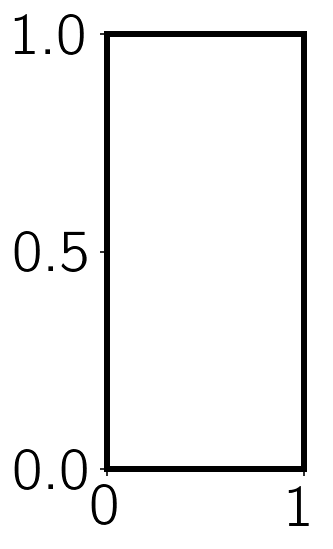

In [9]:
s_s=1.00
subplot(1,3,1)
scatter(fd_dis_sli_a,fr_dis_sli_a,s=s_s,color=basic_colors[2])
scatter(fd_ndis_sli_a ,fr_ndis_sli_a,s=s_s,color=basic_colors[0])
scatter(fd_ndis_nsli_a ,fr_ndis_nsli_a,s=s_s,color=basic_colors[1])
ylim(0,15)

subplot(1,3,2)
scatter(fd_dis_b ,fr_dis_b,s=s_s,color=basic_colors[2])
scatter(fd_ndis_b ,fr_ndis_b,s=s_s,color=basic_colors[1])
ylim(0,15)

subplot(1,3,3)
scatter(fd_dis_c ,fr_dis_c,s=s_s,color=basic_colors[2])
scatter(fd_ndis_c ,fr_ndis_c,s=s_s,color=basic_colors[1])
ylim(0,15)


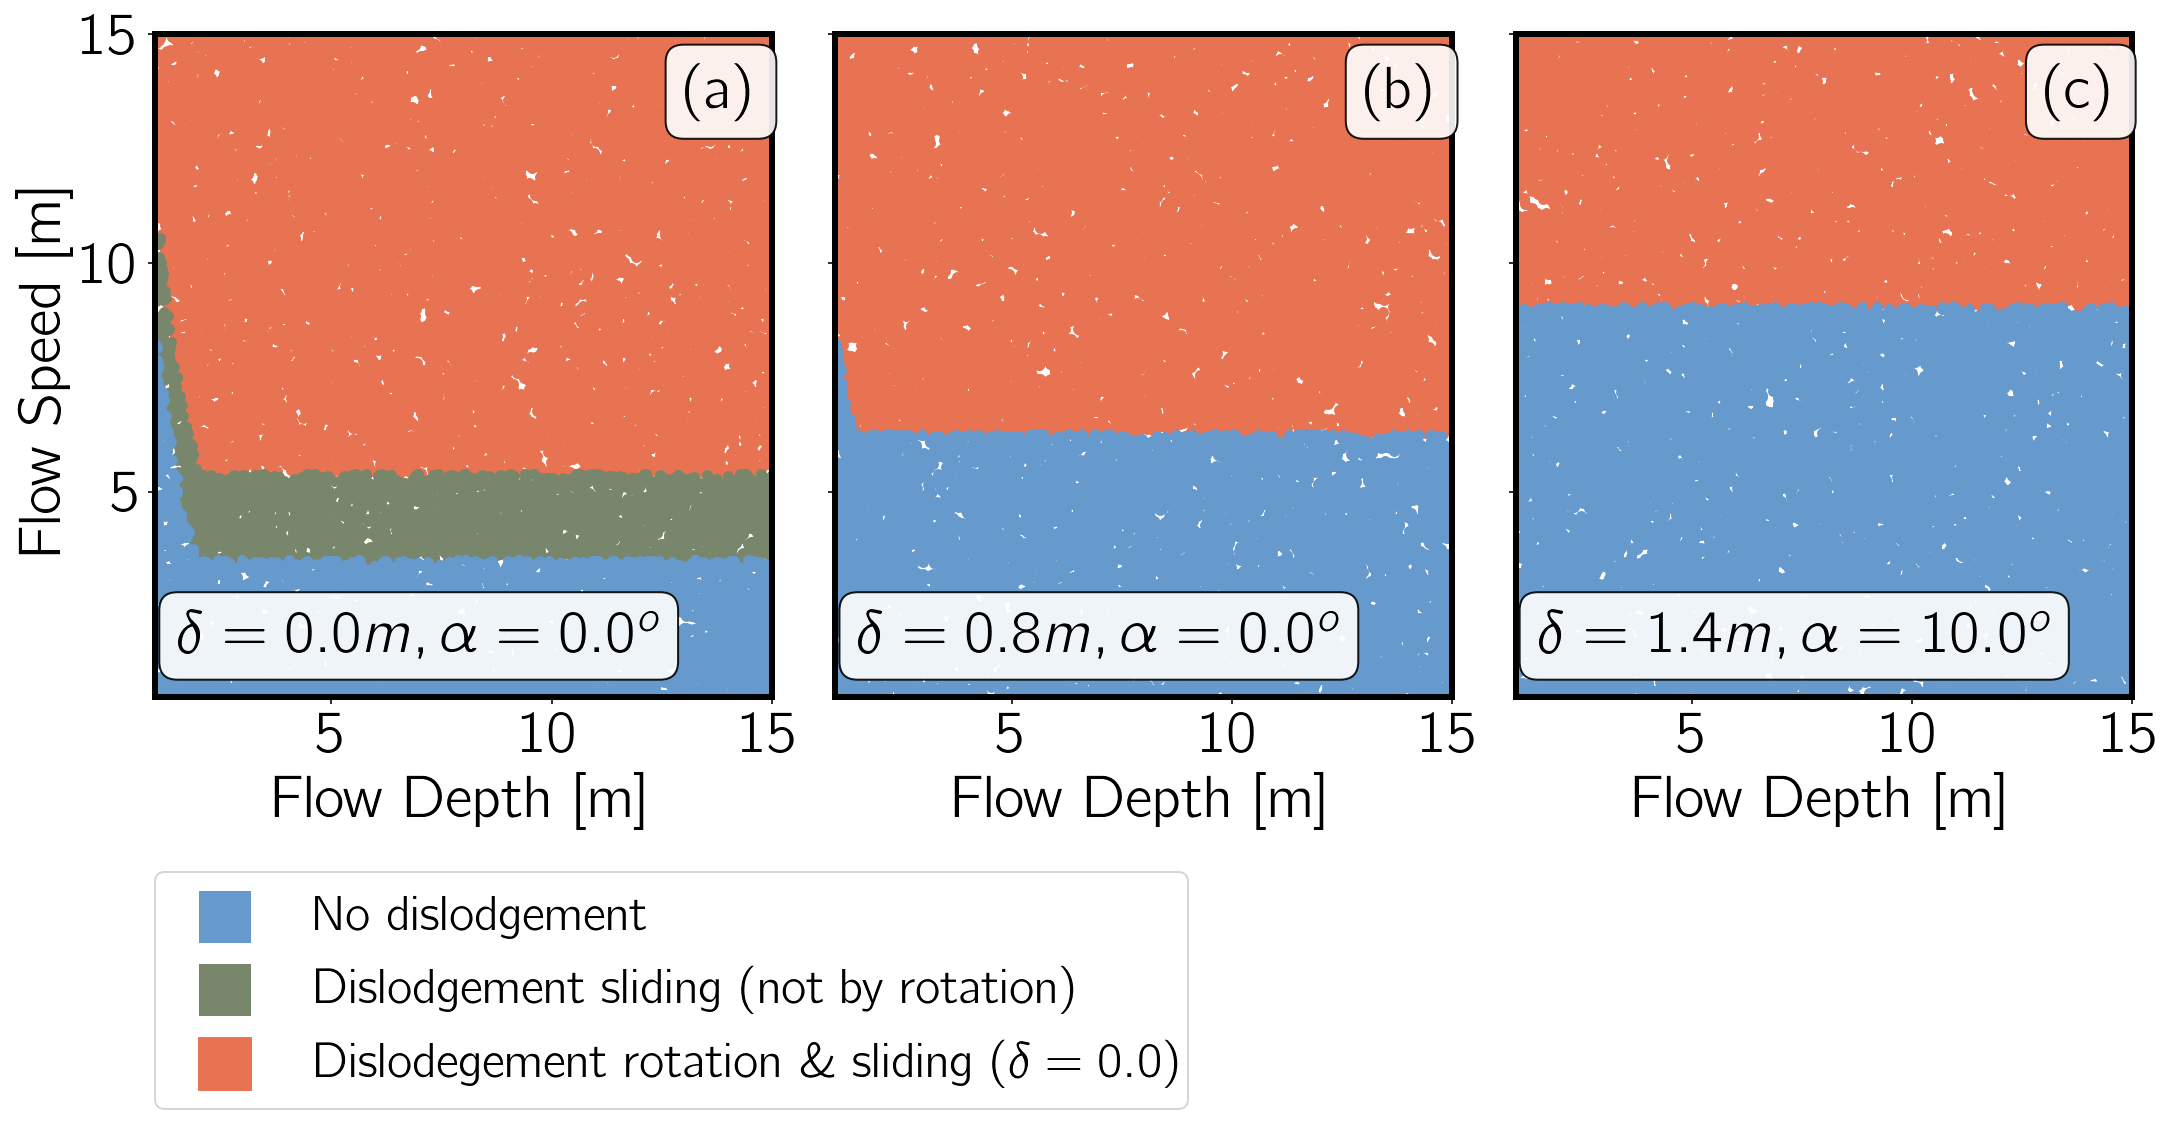

In [11]:
s_s=20.00
al = 0.5
line_w=1
tick_length = 12
col_nm = 'blue'
col_sl = 'orange'
col_mo = 'red'
pane_x = 13
pane_y = 13.4
con_x =1.5
con_y = 1.5

basic_colors = ['#f0f9e8','#bae4bc','#43a2ca','#bdc9b8','#f1f4f0','#97a093']
basic_colors = [(0.47, 0.53, 0.42),((0.4, 0.6, 0.8)),(0.91, 0.45, 0.32)]
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
#fig1 = figure(figsize=(20,5))
#spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
fig, (ax1,ax2,ax3) = subplots(nrows=1,ncols=3,figsize=(15,7),constrained_layout=True) 
# ax1 = fig1.add_subplot(spec2[0, 0])
# ax2 = fig1.add_subplot(spec2[0, 1])
# ax3 = fig1.add_subplot(spec2[0, 2])
#ax4 = fig1.add_subplot(spec2[1, 1])

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=tick_length)
ax1.scatter(fd_dis_sli_a,fr_dis_sli_a,s=s_s,color=basic_colors[2])
ax1.scatter(fd_ndis_sli_a ,fr_ndis_sli_a,s=s_s,color=basic_colors[0])
ax1.scatter(fd_ndis_nsli_a ,fr_ndis_nsli_a,s=s_s,color=basic_colors[1])
ax1.set_xlim(1.00,15)
ax1.set_ylim(0.5,15.0)
#ax1.set_xlabel("Froude Number [']",fontproperties=font)
ax1.set_ylabel("Flow Depth [m]")
ax1.text(pane_x,pane_y, '(a)',bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax1.text(con_x,con_y, r'$\delta = 0.0 m, \alpha = 0.0 ^o$',bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax1.set_xlabel('Flow Depth [m]')
ax1.set_ylabel('Flow Speed [m]')

ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
# ax2.tick_params(which='both', width=2)
# ax2.tick_params(which='major', length=tick_length)
ax2.scatter(fd_dis_b ,fr_dis_b,s=s_s,color=basic_colors[2])
ax2.scatter(fd_ndis_b ,fr_ndis_b,s=s_s,color=basic_colors[1])
#ax2.scatter(fd_ndis_b ,fr_ndis_nsli_b,s=s_s,color=col_nm)
#fr_dis_b ,fd_dis_b,fr_ndis_b ,fd_ndis_b
ax2.set_xlim(1.00,15)
ax2.set_ylim(0.5,15.0)
ax2.set_xlabel("Flow Depth [m]")
ax2.text(pane_x,pane_y, '(b)',bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax2.text(con_x,con_y, r'$\delta = 0.8 m, \alpha = 0.0 ^o$',bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax2.set_yticklabels([])

#ax2.set_xlabel("Froude Number [']",fontproperties=font)
#ax2.set_ylabel("Flow Depth [m]",fontproperties=font)

#ax2.fill_between(tr_x_b,tr_y_b,max(fd_ndis_sli_),color=col_mo, alpha = al)
#ax2.fill_between(tr_x_b1,min(fd_ndis_nsli_b),tr_y_b1,color=col_nm, alpha = al,lw=0)
#ax2.fill_between(tr_x_b2,tr_y_b1,tr_y_b2,color=col_sl,alpha=al,lw=0)
#ax2.fill_between(tr_x_b2,tr_y_b2,max(fd_dis_sli_b),color=col_mo,alpha =al,lw=0)
#ax2.fill_between(tr_x_b3,tr_y_b3,max(fd_dis_sli_b),color=col_mo,alpha=al,lw=0)
#ax2.fill_between(tr_x_b3,min(fd_ndis_nsli_b),tr_y_b3,color=col_nm,alpha=al,lw=0)

#ax2.plot(tr_x_b2,tr_y_b2,'k-')
#ax2.fill_between(tr_x_b2,tr_y_b2,color=col_nm, alpha = al)

ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
# ax3.tick_params(which='both', width=2)
# ax3.tick_params(which='major', length=tick_length)
ax3.scatter(fd_dis_c ,fr_dis_c,s=s_s,color=basic_colors[2])
ax3.scatter(fd_ndis_c ,fr_ndis_c,s=s_s,color=basic_colors[1])
ax3.set_xlim(1.00,15)
ax3.set_ylim(0.5,15.0)
#ax3.set_xlabel("Froude Number [']",fontproperties=font)
ax3.set_xlabel("Flow Depth [m]")
ax3.text(pane_x,pane_y, '(c)',bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax3.text(con_x,con_y, r'$\delta = 1.4 m, \alpha = 10.0 ^o$',bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax3.set_yticklabels([])



# ax1.scatter([],[],marker='s',s=680,facecolor=basic_colors[1],lw=0,label='No Dislodgement',alpha=0.5)
# ax1.scatter([],[],marker='s',s=680,facecolor=basic_colors[0],lw=0,label='Dislodgement by Sliding, No Rotatation',alpha=0.5)
# ax1.scatter([],[],marker='s',s=680,facecolor=basic_colors[2],label = 'Dislodegement by Rotation and Sliding ($\delta =0$)')

ax1.scatter([],[],marker='s',s=680,facecolor=basic_colors[1],lw=0,label='No dislodgement')
ax1.scatter([],[],marker='s',s=680,facecolor=basic_colors[0],lw=0,label='Dislodgement sliding (not by rotation)')
ax1.scatter([],[],marker='s',s=680,facecolor=basic_colors[2],label = 'Dislodegement rotation \& sliding ($\delta =0.0$)')




ax1.legend(bbox_to_anchor=(0.0, -.62, 1.675, .102), loc=3,
               ncol=1, mode="expand", borderaxespad=0)#,bbox_transform=fig.transFigure)

# #ax3.fill_between(tr_x_c,tr_y_c,max(fd_dis_c),color=col_mo, alpha = al)
# #ax3.fill_between(tr_x_c,min(fd_ndis_c),tr_y_c,color=col_nm, alpha = al)

# ax4.yaxis.set_ticks_position('left')
# ax4.xaxis.set_ticks_position('bottom')
# ax4.tick_params(which='both', width=2)
# ax4.tick_params(which='major', length=tick_length)
# ax4.scatter(fd_dis_d ,fr_dis_d,s=s_s,color=col_mo)
# ax4.scatter(fd_ndis_d ,fr_ndis_d,s=s_s,color=col_nm)
# #ax4.set_xlim(0.5,2.5)
# #ax4.set_ylim(0.5,15.0)
# ax4.set_xlabel("Froude Number [']",fontproperties=font);
# #ax4.set_ylabel("Flow Depth [m]",fontproperties=font)
# ax4.text(pane_x,pane_y, '(d)',fontproperties=font)
# ax4.text(con_x,con_y, r'$\delta = 2.0 m, \alpha = 10.0 ^o$')

# #ax4.fill_between(tr_x_d,tr_y_d,max(fd_dis_d),color=col_mo, alpha = al)
# #ax4.fill_between(tr_x_d,min(fd_ndis_d),tr_y_d,color=col_nm, alpha = al)
# #

In [ ]:

#Reading data
### (d)
sl_i = 1
dl_i = 1
print(det_runname(sl_change[sl_i],dl_change[dl_i]))
filename1 = 'out_'+det_runname(sl_change[sl_i],dl_change[dl_i])
fl1 = './data/'+filename1+'_conditions.dat'
fl2 = './data/'+filename1+'_rotation.dat'
data_dis_d = loadtxt(fl2)#,delimiter=",")
condi_d = loadtxt(fl1)#,delimiter=",")


In [ ]:
#make_outputfile(fig,'sloprough',300)
make_outputfile_d('png',fig,tt='sloprough',res=400)

In [ ]:
gra = 9.81
s_s=0.6
al = 0.5
line_w=2.5
tick_length = 12
col_nm = 'blue'
col_sl = 'orange'
col_mo = 'red'
pane_x = 12.75
pane_y = 13.75
con_x = 1.0
con_y = 0.7
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
fig1 = figure(figsize=(14,14))
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig1)

fr = linspace(0.0, 15.0, 100)
fd00_line_x = linspace(0.0,15,100)
fu05_line_y = 0.5 *sqrt(gra*fd00_line_x[:])
fu10_line_y = 1.0 *sqrt(gra*fd00_line_x[:])
fu15_line_y = 1.5 *sqrt(gra*fd00_line_x[:])
fu20_line_y = 2.0 *sqrt(gra*fd00_line_x[:])
fu25_line_y = 2.5 *sqrt(gra*fd00_line_x[:])


ax1 = fig1.add_subplot(spec2[0, 0])
ax2 = fig1.add_subplot(spec2[0, 1])
ax3 = fig1.add_subplot(spec2[1, 0])
ax4 = fig1.add_subplot(spec2[1, 1])

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=tick_length)
ax1.scatter(fd_dis_sli_a ,fr_dis_sli_a,s=s_s,color=col_mo)
ax1.scatter(fd_ndis_sli_a ,fr_ndis_sli_a,s=s_s,color=col_sl)
ax1.scatter(fd_ndis_nsli_a ,fr_ndis_nsli_a,s=s_s,color=col_nm)
ax1.plot(fd00_line_x,fu05_line_y,'k--')
ax1.plot(fd00_line_x,fu10_line_y,'k--')
ax1.plot(fd00_line_x,fu15_line_y,'k--')
ax1.plot(fd00_line_x,fu20_line_y,'k--')
ax1.plot(fd00_line_x,fu25_line_y,'k--')

ax1.set_xlim(0.1,15.0)
ax1.set_ylim(0.1,15.0)
#ax1.set_xlabel("Froude Number [']",fontproperties=font)
ax1.set_ylabel("Flow speed [$\mathbf{m}\,\mathbf{s^{-1}}$]",fontproperties=font)
ax1.text(pane_x,pane_y, '(a)',fontproperties=font)
ax1.text(con_x,con_y, r'$\delta = 0.0 m, \alpha = 0.0 ^o$')
ax1.set_aspect('equal')


ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=tick_length)
ax2.scatter(fd_dis_sli_b ,fr_dis_sli_b,s=s_s,color=col_mo)
ax2.scatter(fd_ndis_sli_b ,fr_ndis_sli_b,s=s_s,color=col_sl)
ax2.scatter(fd_ndis_nsli_b ,fr_ndis_nsli_b,s=s_s,color=col_nm)
ax2.plot(fd00_line_x,fu05_line_y,'k--')
ax2.plot(fd00_line_x,fu10_line_y,'k--')
ax2.plot(fd00_line_x,fu15_line_y,'k--')
ax2.plot(fd00_line_x,fu20_line_y,'k--')
ax2.plot(fd00_line_x,fu25_line_y,'k--')

ax2.set_xlim(0.1,15.0)
ax2.set_ylim(0.1,15.0)
ax2.text(pane_x,pane_y, '(b)',fontproperties=font)
ax2.text(con_x,con_y, r'$\delta = 0.0 m, \alpha = 10.0 ^o$')
ax2.set_aspect('equal')




ax3.yaxis.set_ticks_position('left')
ax3.xaxis.set_ticks_position('bottom')
ax3.tick_params(which='both', width=2)
ax3.tick_params(which='major', length=tick_length)
ax3.scatter(fd_dis_d ,fr_dis_d,s=s_s,color=col_mo)
ax3.scatter(fd_ndis_d ,fr_ndis_d,s=s_s,color=col_nm)
ax3.plot(fd00_line_x,fu05_line_y,'k--')
ax3.plot(fd00_line_x,fu10_line_y,'k--')
ax3.plot(fd00_line_x,fu15_line_y,'k--')
ax3.plot(fd00_line_x,fu20_line_y,'k--')
ax3.plot(fd00_line_x,fu25_line_y,'k--')

ax3.set_xlim(0.1,15.0)
ax3.set_ylim(0.1,15.0)
ax3.set_xlabel("Flow Depth [m]",fontproperties=font)
ax3.set_ylabel("Flow speed [$\mathbf{m}\,\mathbf{s^{-1}}$]",fontproperties=font)
ax3.text(pane_x,pane_y, '(c)',fontproperties=font)
ax3.text(con_x,con_y, r'$\delta = 1.4 m, \alpha = 0.0 ^o$')
ax3.set_aspect('equal')



ax4.yaxis.set_ticks_position('left')
ax4.xaxis.set_ticks_position('bottom')
ax4.tick_params(which='both', width=2)
ax4.tick_params(which='major', length=tick_length)
ax4.scatter(fd_dis_c ,fr_dis_c,s=s_s,color=col_mo)
ax4.scatter(fd_ndis_c ,fr_ndis_c,s=s_s,color=col_nm)
ax4.plot(fd00_line_x,fu05_line_y,'k--')
ax4.plot(fd00_line_x,fu10_line_y,'k--')
ax4.plot(fd00_line_x,fu15_line_y,'k--')
ax4.plot(fd00_line_x,fu20_line_y,'k--')
ax4.plot(fd00_line_x,fu25_line_y,'k--')

ax4.set_xlim(0.1,15.0)
ax4.set_ylim(0.1,15.0)
ax4.set_xlabel("Flow Depth [m]",fontproperties=font);
#ax4.set_ylabel("Flow Depth [m]",fontproperties=font)
ax4.text(pane_x,pane_y, '(d)',fontproperties=font)
ax4.text(con_x,con_y, r'$\delta = 1.4 m, \alpha = 10.0 ^o$')
ax4.set_aspect('equal')

ax1.text(10,6,'Fr=0.5',rotation=13,size=20,bbox=dict(boxstyle='square,pad=-0.0',
                   ec=(1, 1.0, 1.0), fc=(1., 1, 1)))

ax1.text(10.,11.6,'Fr=1.0',rotation=25,size=20,bbox=dict(boxstyle='square,pad=-0.0',
                   ec=(1, 1.0, 1.0), fc=(1., 1, 1)))
ax1.text(6,14,'Fr=1.5',rotation=40,size=20,bbox=dict(boxstyle='square,pad=-0.0',
                   ec=(1, 1.0, 1.0), fc=(1., 1, 1)))
ax1.text(2.7,14,'Fr=2.0',rotation=57,size=20,bbox=dict(boxstyle='square,pad=-0.0',
                   ec=(1, 1.0, 1.0), fc=(1., 1, 1)))
ax1.text(0.95,12.75,'Fr=2.5',rotation=70,size=20)

In [ ]:
make_outputfile(fig1,'modes',300)

In [ ]:
def densities(fr_nd,fd_nd,fr_d,fd_d):
    froude_number = 1.7
    df = 0.2
    du = 1.6    
    n_fd = int((amax(fd)-amin(fd))/du)+11
    fd_new = linspace(amin(df),amax(fd), n_fd)
    print(n_fd)
    n1 = []
    n2 = []
    dd_fr = []
    dd_fd = []
    nd_fr = []
    nd_fd = []
    print(fd_new[1]-fd_new[0])
    for i in range(n_fd):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        y1 = fd_new[i]
        y2 = fd_new[i] + du
        dummy1 = 0
        for j in range(0,len(fd_nd)-1):
            if fr_nd[j]>= x1  and fr_nd[j] <= x2 and fd_nd[j]>=y1 and fd_nd[j] <= y2:
                dummy1 += 1
        n1.append(dummy1)
    for i in range(n_fd):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        y1 = fd_new[i]
        y2 = fd_new[i] + du
        dummy1 = 0
        for j in range(0,len(fd_d)-1):
            if fr_d[j]>= x1  and fr_d[j] <= x2 and fd_d[j]>=y1 and fd_d[j] <= y2:
                dummy1 += 1
        n2.append(dummy1)

    for j in range(len(fr_nd)):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        if fr_nd[j]>=x1 and fr_nd[j]<=x2:
                nd_fr.append(fr_nd[j])
                nd_fd.append(fd_nd[j])
    for j in range(len(fr_d)):
        x1 = froude_number - 0.5*df
        x2 = froude_number + 0.5*df
        if fr_d[j]>=x1 and fr_d[j]<=x2:
                dd_fr.append(fr_d[j])
                dd_fd.append(fd_d[j])

    dens1_l  = []    
    dens2_l  = []

    for i in range(n_fd):
        dummy1 = n1[i]+n2[i]
        if dummy1 == 0.0:
            dummy1 = 0.0001
        dens1_l.append(n1[i]/dummy1)
        dens2_l.append(n2[i]/dummy1)
    plot(fd_new,dens1_l)
    plot(fd_new,dens2_l)

    print(len(dd_fr))
    return nd_fr,nd_fd,dd_fr,dd_fd


In [ ]:
x1,y1,x2,y2=densities(fr_ndis ,fd_ndis,fr_dis ,fd_dis)

In [ ]:
#### scatter(fr_ndis,fd_ndis,s=5)
scatter(x1,y1,s=10)

scatter(x2,y2,s=10)


In [ ]:
sl_i = 6
m=0
trans_1 = []
for j in range(len(dl_change)):
        m = m +1
        filename = 'out_'+det_runname(sl_change[sl_i],dl_change[j])
        fl1 = './data/'+filename+'_conditions.dat'
        fl2 = './data/'+filename+'_rotation.dat'
        print(m,sl_i,j,filename,sl_change[sl_i])
        data_dis = loadtxt(fl2)#,delimiter=",")
        condi = loadtxt(fl1)#,delimiter=",")
        fd = condi[:,1]
        fr = condi[:,0]
        time = data_dis[:,0]
        critical_angle = 0.5 * pi
        critical_dista = 3.0
        fr_dis ,fd_dis,fr_ndis ,fd_ndis = \
            motion_space_p(fr,fd,data_dis[:,1:],critical_angle)
        trans_1.append(trans_fr(fr_dis,fd_dis,froude_value,df))
#        subplot(4,4,m)
#        scatter(fr_dis,fd_dis,color = 'r',alpha=al)
#        scatter(fr_ndis,fd_ndis,color = 'b',alpha=al)

In [ ]:
sl_i = 6
m=0
trans_2 = []
for j in range(len(dl_change)):
        m = m +1
        filename = 'out_'+det_runname(sl_change[sl_i],dl_change[j])
        fl1 = './data/'+filename+'_conditions.dat'
        fl2 = './data/'+filename+'_rotation.dat'
        print(m,sl_i,j,filename)
        data_dis = loadtxt(fl2)#,delimiter=",")
        condi = loadtxt(fl1)#,delimiter=",")
        fd = condi[:,1]
        fr = condi[:,0]
        time = data_dis[:,0]
        critical_angle = 0.5 * pi
        critical_dista = 3.0
        fr_dis ,fd_dis,fr_ndis ,fd_ndis = \
            motion_space_p(fr,fd,data_dis[:,1:],critical_angle)
        
        trans_2.append(trans_fr(fr_dis,fd_dis,froude_value,df))

#        subplot(4,4,m)
#        scatter(fr_dis,fd_dis,color = 'r',alpha=al)
#        scatter(fr_ndis,fd_ndis,color = 'b',alpha=al)

In [ ]:
plot(dl_change,trans_1,'k-')
plot(dl_change,trans_2,'r-')
plot(dl_change,trans_0,'b-')

